## AUDIO AND SOUND

**Sound signal** is produced by variations in air pressure, where it can be measured by the intensity of the pressure variations over times. Sound signals often repeat at regular intervals so that each wave has the same shape. The heigh shows the intensity of the sound and is knownd as **the amplitude**. The time taken for the signal to complete one full wave is **the period**. The number of waves made by the singal in one second is called **the frequency**.  

To **represend sound digitally** we must turn the signal into a series of numbers so that we can input it into our models. This can be done by **measureing the amplitude of the sound at fixed intervals of time**. Each measurement is called a sample, and the sample rate is the number of samples per second. IE: 44.100 samples per seconds. 

Signal of different frequencies can be added together to create composite signals which can be called as **spectrum. It plots all the frequencies that are present in the signal along with the strenght or amplitude of each frequency**. The lowest frequency is called fundamental frequency. While harmonics is a multiplication of fundamental frequency.  **The wavefroms signal can be seen in time domain (Amplitude-Time) and frequency domain (Amplitude-Frequency).** 

Since signal produce different sound (frequency) over time, therefore, the spectrum also varies over time. **Spectogram** is a a plot of specturm over time, **it plots time on the axis X and frequency on the axis y.** Where it uses different colors to indicate the amplitude or strengh of each frequency. 

*Source: https://towardsdatascience.com/audio-deep-learning-made-simple-part-1-state-of-the-art-techniques-da1d3dff2504*
<br>
*Source: https://github.com/PrabhjotKaurGosal/Helpful-scripts-for-MachineLearning/blob/main/AudioFeatureExtraction_vX.ipynb* 


### I. IMPORT PYTHON LIBRARIES

In [30]:
import numpy as np 
import librosa as librosa
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import librosa.display
import pandas as pd 
import os 
from sklearn.model_selection import train_test_split
import splitfolders 
import skimage.io

### II. LOAD SAMPLE AUDIO FILE

In [31]:
y, sr = librosa.load("G:/My Drive/Work Data/PT. Hutomo Bangun Perkasa/Hydroinformatics/Thesis Research/Audio Sample/h01 (1).wav", sr=32000)

### III. DISPLAY THE AUDIO FILE IN TIME DOMAIN

The sample audio is displayed as a numpy array (time series) and has (150842,) number of samples
The 10 randomly picked consequtive samples of the audio are: [-2.6851608e-03 -3.6718054e-03 -4.0539969e-03 -3.2744098e-03
 -1.7284417e-03 -5.2673742e-04 -1.8879087e-05  1.7206337e-04
  3.6518669e-04 -1.0214845e-03]


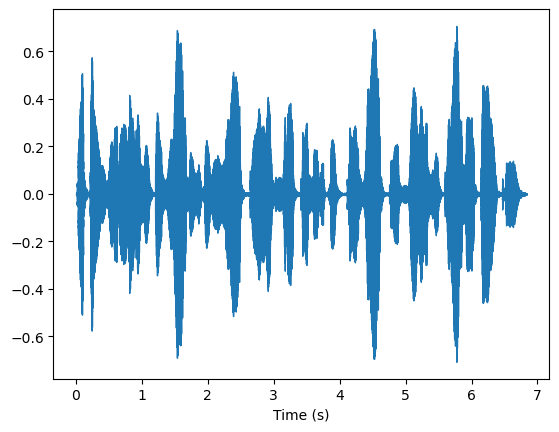

In [32]:
librosa.display.waveshow(y, max_points=11025, x_axis='s')
print("The sample audio is displayed as a numpy array (time series) and has", y.shape, "number of samples")
print("The 10 randomly picked consequtive samples of the audio are:", y[3000:3010])

### IV. DISPLAY THE AUDIO FILE IN FREQUENCY DOMAIN

**To transform signals in time domain to frequency domain**, we need to **use Fourier Transform technique** called by Discrete Fourier Transform (DFT), this technique is very expensive to compute. Therefore, in parctice, the Fast Fourier Transform (FFT) algortihm is used, which is an efficient way to to implement DFT. However, the FFT will give you the overall frequency components for the entire time series of the audio signal as a whole. It wont tell you how those frequency components change over time within the audio signal. 

Therefore, we should use **The Short-Time Fourier Transform (STFT)** to get more granular view and frequency variations over time. This method breaks audio signal into smaller section by using a sliding time window. It takes the FFT on teach section and then combines them. 

*Source: https://towardsdatascience.com/audio-deep-learning-made-simple-part-3-data-preparation-and-augmentation-24c6e1f6b52* 

In [33]:
# Size of the Fast Fourier Transform (FFT), which will also be used as the window length
n_fft=1024

# Step or stride between windows. If the step is smaller than the window length, the windows will overlap
hop_length=320

# Specify the window type for FFT/STFT
window_type ='hann'

# Calculate the spectrogram as the square of the complex magnitude of the STFT
spectrogram_librosa = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length, win_length=n_fft, window=window_type)) ** 2

print("The shape of spectrogram_librosa is: ", spectrogram_librosa.shape)
print("The size of the spectrogram is ([(frame_size/2) + 1 x number of frames])")
print("The frame size that we have specified is the number of samples to consider for the STFT. In our case, it is equal to the n_fft",n_fft, " samples")

The shape of spectrogram_librosa is:  (513, 472)
The size of the spectrogram is ([(frame_size/2) + 1 x number of frames])
The frame size that we have specified is the number of samples to consider for the STFT. In our case, it is equal to the n_fft 1024  samples


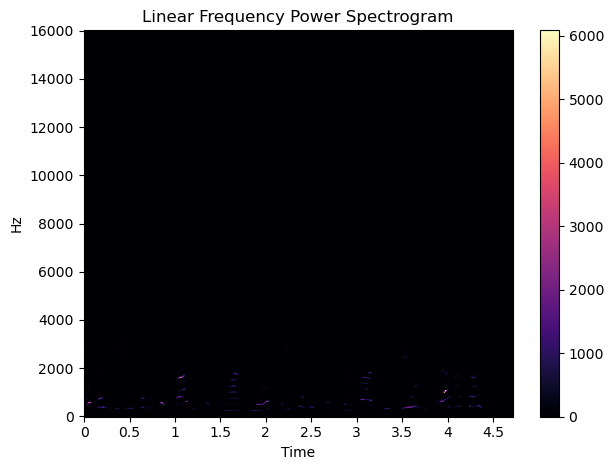

In [26]:
# Display the Spectogram 
librosa.display.specshow(spectrogram_librosa, sr=sr, x_axis='time', y_axis='linear',hop_length=hop_length)
plt.title('Linear Frequency Power Spectrogram')
plt.colorbar()
plt.tight_layout()
plt.show()

### V. Transform Spectogram to the Mel Spectogram 
The spectogram is hard to read as our hearing range is limited to a small set of frequencies and amplitude. **Humans perceive amplitude of a sound as its loudness not in linearly but in logarithmically scale.** For example: 0 dB is silent and 10 dB is ten times louder than 0 dB. **In frequencies, human percevie it also on loratichmic scale.** For example: we can easily differenciate frenquencies between 100 Hz and 200 Hz but we cant tell the different betwwen 100 Hz and 101 Hz. Therfore, it is important for us to use a **logarithmic scale via the Mel Scale (for frequency)** and **the Decibel scale (for amplitude)** when dealing with Frequencies and Amplitudes for an audio input.

**Mel Spectogram** is calculated so that two pairs of frequencies separated by a delta in the mel scale are perceived by humans as being equidistant. **The shape of the Mel spectrogram** is [number of mel bands x (frame_size/2) + 1, where frame_size is the number of FFT components (n_fft)

The shape of mel spectrogram is:  (64, 472)


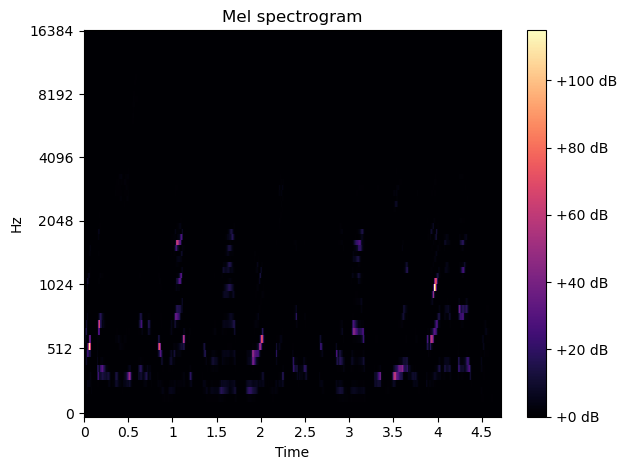

In [35]:
mel_bins = 64 # Number of mel bands
fmin = 0
fmax= None
Mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, win_length=n_fft, window=window_type, n_mels = mel_bins, power=2.0)
print("The shape of mel spectrogram is: ", Mel_spectrogram.shape)

librosa.display.specshow(Mel_spectrogram, sr=sr, x_axis='time', y_axis='mel',hop_length=hop_length)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()

The shape of Log Mel spectrogram is:  (64, 472)


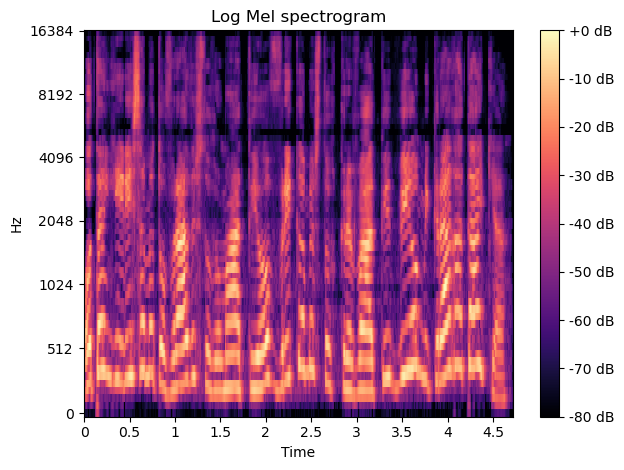

In [36]:
mel_spectrogram_db = librosa.power_to_db(Mel_spectrogram, ref=np.max)
print("The shape of Log Mel spectrogram is: ", mel_spectrogram_db.shape)
librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel',hop_length=hop_length)
plt.colorbar(format='%+2.0f dB')
plt.title('Log Mel spectrogram')
plt.tight_layout()
plt.show()